# Frequentist Inference Case Study - <b>Part B</b>

## 1. Objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

---

---

---

## 2. Dataset: Hospital Medical Charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* Has the hospital's revenue stream fallen below a key threshold?
* Are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

## 3. Dependencies

In [95]:
import numpy as np
import pandas as pd
from scipy.stats import t
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## 4. Load Data

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/data/11.1.insurance2.csv'
medical = pd.read_csv(FILE_PATH)

## 5. Visualize Data

In [98]:
medical.shape

(1338, 8)

In [99]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Target Variable

In [100]:
target = medical['charges']

---

## $\small\textbf{Q1.}$ EDA

Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [101]:
# Calculate mean, median, and standard deviation
mean    = np.mean(target)
median  = np.median(target)
std_dev = np.std(target)

In [102]:
print(f"Mean = {mean}")
print(f"Median = {median}")
print(f"Standard Deviation = {std_dev }")

Mean = 13270.422265141257
Median = 9382.033
Standard Deviation = 12105.484975561612


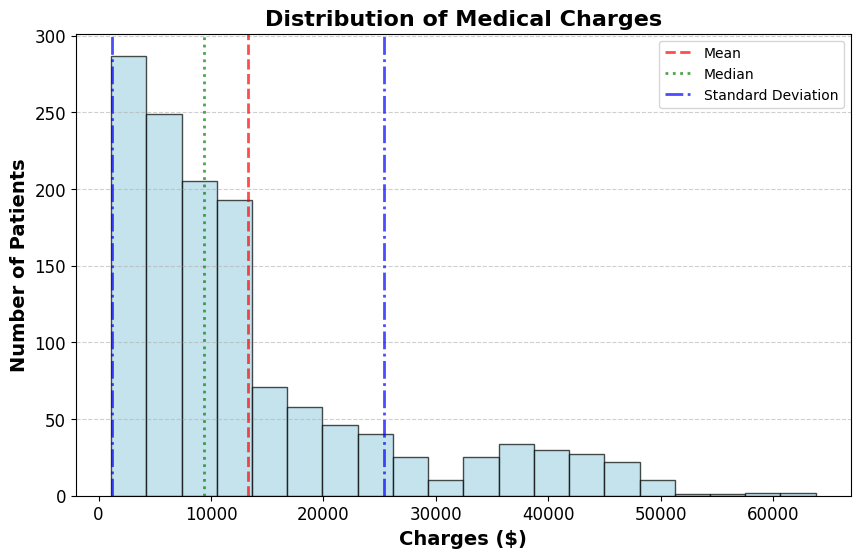

In [103]:
# Create a histogram with customizations
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
plt.hist(target, bins=20, edgecolor='k', color='lightblue', alpha=0.7)

# Add labels and a title
plt.xlabel('Charges ($)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
plt.title('Distribution of Medical Charges', fontsize=16, fontweight='bold')

# Customize the ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add vertical lines for mean and standard deviation
plt.axvline(mean + 0 * std_dev, color='red' , linestyle='--', linewidth=2, alpha=0.7, label=f'Mean')
plt.axvline(median            , color='green', linestyle=':', linewidth=2, alpha=0.7, label=f'Median')
plt.axvline(mean + 1 * std_dev, color='blue', linestyle='-.', linewidth=2, alpha=0.7, label=f'Standard Deviation')
plt.axvline(mean - 1 * std_dev, color='blue', linestyle='-.', linewidth=2, alpha=0.7)

# Show a legend
plt.legend()

# Show the plot
plt.show()


---

## $\small\textbf{Q2.}$ Assessing concerns about average charges and selecting the most suitable Frequentist Test

The administrator is concerned that the actual average charge has fallen below $\$12,000$, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

><font color="grey" size="3">
> We can leverage the principles of the Central Limit Theorem in conjunction with the t-distribution to establish a $95\%$ confidence interval for the population mean of charges. Our computed sample mean, which slightly exceeds $\$13,270$, serves as the point estimate. Should the value of $\$12,000$ fall beyond this confidence interval, we can assert with statistical confidence that the true population mean charge does not descend to such a low level.
</font>

---

## $\small\textbf{Q3.}$ Determining the appropriate Confidence Interval and Significance for administrator's concerns

Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

> <font color="grey" size="3">
> Considering the administrator's concern and the nature of the question, it is appropriate to employ a one-sided confidence interval. The rationale behind this choice is that the administrator is specifically concerned about the possibility of the mean charge being below a certain threshold ($\$12,000$), and we are not interested in investigating both sides of the mean.
> </font>
> <font color="grey" size="3">
>
> To calculate the critical value for this one-sided $95\%$ confidence interval, we would need to use the t-distribution. With the given sample data and sample mean ($\$13,270$), we can calculate the standard error of the mean and determine the appropriate t-value for a $95\%$ confidence level with a one-tailed test.
> </font>
> <font color="grey" size="3">
>
> After obtaining the critical t-value, we can construct the lower limit of the one-sided $95\%$ confidence interval. If this lower limit is below $\$12,000$, it would indicate that there is a statistically significant reason for concern, suggesting that the true population mean charge may indeed fall below $\$12,000$. On the other hand, if the lower limit is above $\$12,000$, the administrator's concern may not be statistically justified, and it would provide evidence that the true mean charge is likely higher than $\$12,000$.
> </font>
> <font color="grey" size="3">
>
> In conclusion, the use of a one-sided confidence interval and subsequent calculations will help determine whether the administrator's concern is statistically warranted, providing a more rigorous and precise answer to their question.
</font>

In [104]:
n = len(target)
df = n-1
crit_value = t.ppf(0.95, df)

In [105]:
lower95 = np.mean(target) - (crit_value/np.sqrt(n))*np.std(target)
print(lower95)

12725.690859802162


> <font color="grey" size="3">
>
> The administrator's concern can be alleviated based on the statistical analysis. By calculating a one-sided $95\%$ confidence interval for the mean charge, we obtain a lower limit of $\$12,725.7$. This lower limit represents the threshold below which the true population mean charge is highly unlikely to fall. In other words, there is strong statistical evidence that the mean charge has not decreased to $\$12,000$.
</font>
> <font color="grey" size="3">
>
> This conclusion is drawn from the principles of statistical hypothesis testing and confidence intervals, which provide a rigorous framework for assessing the probability of the population parameter (mean charge, in this case) lying within a specified range. In this instance, the lower limit of the confidence interval, $\$12,725.7$, indicates a level of confidence such that the true mean charge is expected to be greater than $\$12,000$ with a high degree of certainty, assuaging the administrator's concern from a scientific standpoint.
</font>


---

## $\small\textbf{Q4.}$ Hypothesis testing for differences in medical charges: Insurance vs. No Insurance

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:

<br>

\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

<br>

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{\Large\frac{1}{n_0} \normalsize{+} \Large\frac{1}{n_1}}}.
\end{equation}
<br>
(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

> <font color="grey" size="3">
> <font color="black" size="4"><b>Null and Alternative Hypotheses</b></font>
>
> To investigating whether individuals with insurance are charged a significantly different amount compared to those without insurance, we formulate the null hypothesis ($H0$) and the alternative hypothesis ($Ha$) as below:
> </font>
>
> <b> Null Hypothesis ($H0$)</b>
>
> <font color="grey" size="3">
> There is no significant difference in the mean medical charges between individuals with insurance ($\mu_0$) and those without insurance ($\mu_1$). Mathematically, this can be expressed as:
>
> $H0 : \mu_0 - \mu_1 = 0$
> </font>
>
> <b> Alternative Hypothesis ($Ha$)</b>
>
> <font color="grey" size="3">
> There is a significant difference in the mean medical charges between individuals with insurance and those without insurance. Mathematically, this can be expressed as:
>
> $Ha : \mu_0 - \mu_1 \neq 0$
> </font>

> <font color="grey" size="3">
> <font color="black" size="4"><b>Assumption about Variances</b></font>
>
> In the t-test for the difference between means, we make the assumption that the variances of the two groups (individuals with and without insurance) are approximately equal. This assumption is known as the $\small\textbf{assumption of homogeneity of variances}$ or $\small\textbf{homoscedasticity}$.
> </font>
>
> <font color="grey" size="3">
> It implies that the spread or dispersion of medical charges is similar in both groups. Violations of this assumption can affect the validity of the t-test results. In such cases, we can perform additional tests, such as Levene's test, to assess the equality of variances when this assumption is in doubt.
> </font>

---

## $\small\textbf{Q5.}$ Hypothesis Testing: Manual calculation vs <code><b>scipy.stats</b></code> for independent samples t-Test

Perform this hypothesis test both manually, using the above formula, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [106]:
insured, uninsured = target[medical['insuranceclaim'] == 1], target.loc[medical['insuranceclaim'] == 0]

n0, n1       = len(insured), len(uninsured)
s0, s1       = np.std(insured), np.std(uninsured)
x0bar, x1bar = np.mean(insured), np.mean(uninsured)

In [107]:
print(f"Mean (insured)   = {x0bar}")
print(f"Mean (uninsured) = {x1bar}")
print(f"STD (insured)    = {s0}")
print(f"STD (uninsured)  = {s1}")

Mean (insured)   = 16423.928276537677
Mean (uninsured) = 8821.421892306305
STD (insured)    = 14036.956250260417
STD (uninsured)  = 6440.699841605235


### 1. Calculated manually

In [108]:
df = n0 + n1 - 2

In [109]:
sp = np.sqrt(((n0-1) * s0**2 + (n1-1) * s1**2) / df)
print(f"pooled STD = {sp}")

pooled STD = 11512.282899205748


In [118]:
t_stat_manual  = (x0bar - x1bar) / (sp * np.sqrt(1/n0 + 1/n1))
p_value_manual = 2 * (1 - t.cdf(np.abs(t_stat_manual), df))

print(f"t-statistic = {t_stat_manual}")
print(f"p-value     =  {p_value_manual}")

t-statistic = 11.901306943555388
p-value     =  0.0


### 2. Calculated using SciPy

In [119]:
# Perform a t-test on insured and uninsured individuals
t_stat, p_value = ttest_ind(insured, uninsured)

# Print the t-statistic and p-value
print(f"t-statistic = {t_stat}")
print(f"p-value     = {p_value}")

t-statistic = 11.893299030876712
p-value     = 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

---

## $\small\textbf{Q6.}$ Exploring statistical test functions in <code><b>scipy.stats</b></code>: Comparing t-Tests and Z-Tests

Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

> <font color="grey" size="3">
> Scipy's <code><b>scipy.stats</b></code> module primarily provides functions for performing t-tests on sample data but does not include a direct equivalent for performing a z-test from a sample. The primary reason for this is that the z-test typically requires knowledge of population parameters (e.g., population standard deviation) and is often used when working with larger sample sizes or when the population distribution is known.
> </font>
> <font color="grey" size="3">
>
> In contrast, the t-test is designed for cases where you do not know the population standard deviation and relies on the sample standard deviation to estimate it. The t-test is more robust in situations where the sample size is small, and the population standard deviation is unknown.
> </font>
> <font color="grey" size="3">
>
> To perform a z-test from a sample in Scipy, we would typically calculate the test statistic manually using the sample mean, sample standard deviation, and the known population parameters (if available), and then use standard normal distribution functions (e.g., <code><b>scipy.stats.norm.cdf</b></code>) to obtain the p-value.
> </font>

---

---

---

## Conclusions

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test